In [41]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np
import seaborn as sns

In [4]:
def minMaxScale(df):
    columns = ['High','Low','Volume']
    min_max_scaler = preprocessing.MinMaxScaler()
    normDf = df.copy()
    normDf[columns] = pd.DataFrame(min_max_scaler.fit_transform(normDf[columns]))
    return normDf



def readStock(filename):
    basePath = "/Users/qiuzi/Desktop/Final_Project_Data/Resources/"
    filePath = basePath+filename
    df = pd.read_csv(filePath).dropna()
    df['Date'] = pd.to_datetime(df['Date'])
    df1 = df[['Date','High','Low','Volume']]
    

    return minMaxScale(df1)

In [5]:
acnDf=readStock('ACN(Accentureplc).csv')
adbeDf=readStock('ADBE(Adobe).csv')
amdDf=readStock('AMD.csv')
crmDf=readStock('CRM(salesforce).csv')
ibmDf=readStock('IBM.csv')
intcDf=readStock('INTC(Intel).csv')
intuDf=readStock('INTU(Intuit).csv')
nflxDf=readStock('NFLX(Netflix).csv')
sonyDf=readStock('SONY.csv')
txnDf=readStock('TXN(Texas Instrument).csv')

In [6]:
acnDf.head()

,Date,High,Low,Volume
0,2013-01-18,0.000000,0.001190,0.062815
1,2013-01-22,0.000979,0.002292,0.101015
2,2013-01-23,0.003859,0.004178,0.110354
3,2013-01-24,0.005356,0.004874,0.074953
4,2013-01-25,0.006105,0.005832,0.085750


## Concating the Companies

In [7]:
tech_df=pd.concat([acnDf,
adbeDf,
amdDf,
crmDf,
ibmDf,
intcDf,
intuDf,
nflxDf,
sonyDf,
txnDf])

In [8]:
tech_df.head()

,Date,High,Low,Volume
0,2013-01-18,0.000000,0.001190,0.062815
1,2013-01-22,0.000979,0.002292,0.101015
2,2013-01-23,0.003859,0.004178,0.110354
3,2013-01-24,0.005356,0.004874,0.074953
4,2013-01-25,0.006105,0.005832,0.085750


In [9]:
tech_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25160 entries, 0 to 2515
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    25160 non-null  datetime64[ns]
 1   High    25160 non-null  float64       
 2   Low     25160 non-null  float64       
 3   Volume  25160 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 982.8 KB


In [10]:
tech_df.describe()

,High,Low,Volume
count,25160.000000,25160.000000,25160.000000
mean,0.330244,0.333348,0.093988
std,0.259887,0.260317,0.081468
min,0.000000,0.000000,0.000000
25%,0.092306,0.094323,0.043578
50%,0.289959,0.294616,0.072411
75%,0.517370,0.519514,0.117697
max,1.000000,1.000000,1.000000


In [11]:
tech_df

,Date,High,Low,Volume
0,2013-01-18,0.000000,0.001190,0.062815
1,2013-01-22,0.000979,0.002292,0.101015
2,2013-01-23,0.003859,0.004178,0.110354
3,2013-01-24,0.005356,0.004874,0.074953
4,2013-01-25,0.006105,0.005832,0.085750
...,...,...,...,...
2511,2023-01-10,0.866375,0.860790,0.100149
2512,2023-01-11,0.863011,0.867382,0.123333
2513,2023-01-12,0.875524,0.867741,0.101926
2514,2023-01-13,0.863365,0.863127,0.083625


## Average per Day of Data using groupby

In [12]:
df_tech=tech_df.groupby("Date")[['High','Low','Volume']].mean().dropna()

In [13]:
df_tech

,High,Low,Volume
Date,,,
2013-01-18,0.088185,0.089929,0.221179
2013-01-22,0.089095,0.090663,0.156566
2013-01-23,0.100074,0.098575,0.182072
2013-01-24,0.098849,0.099807,0.174373
2013-01-25,0.100034,0.101657,0.249876
...,...,...,...
2023-01-10,0.492319,0.496346,0.064977
2023-01-11,0.496318,0.501439,0.092409
2023-01-12,0.506927,0.507338,0.091023


In [14]:
df_tech.describe()

,High,Low,Volume
count,2516.000000,2516.000000,2516.000000
mean,0.330244,0.333348,0.093988
std,0.202775,0.203709,0.034394
min,0.088185,0.089929,0.009108
25%,0.145347,0.148510,0.069801
50%,0.293475,0.295671,0.086881
75%,0.477355,0.478864,0.111360
max,0.851055,0.860748,0.261918


In [15]:

df_tech.to_csv('Tech_Scaled_Data_Averaged.csv', encoding='utf-8')

## Ploting Graph Volume trading verse Date

(0.0, 0.3)

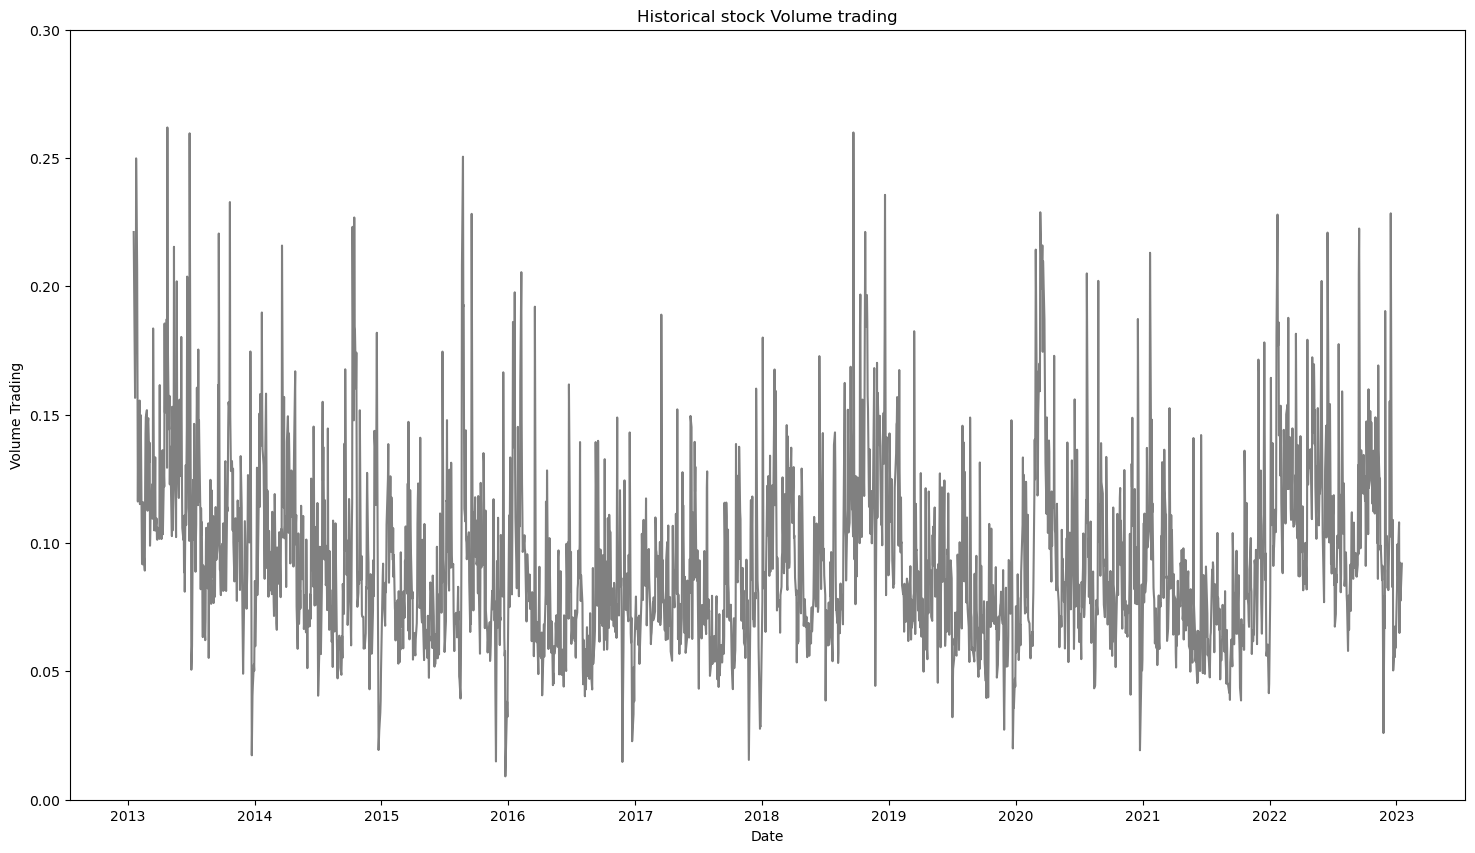

In [16]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(df_tech.Volume, color='grey', linestyle= '-')
ax.set(title = "Historical stock Volume trading",
       xlabel = "Date",
       ylabel = "Volume Trading")


plt.ylim(0, 0.3)

In [17]:
Sorted_df = df_tech.sort_values(by=['Date'])
Sorted_df

,High,Low,Volume
Date,,,
2013-01-18,0.088185,0.089929,0.221179
2013-01-22,0.089095,0.090663,0.156566
2013-01-23,0.100074,0.098575,0.182072
2013-01-24,0.098849,0.099807,0.174373
2013-01-25,0.100034,0.101657,0.249876
...,...,...,...
2023-01-10,0.492319,0.496346,0.064977
2023-01-11,0.496318,0.501439,0.092409
2023-01-12,0.506927,0.507338,0.091023


(0.0, 1.0)

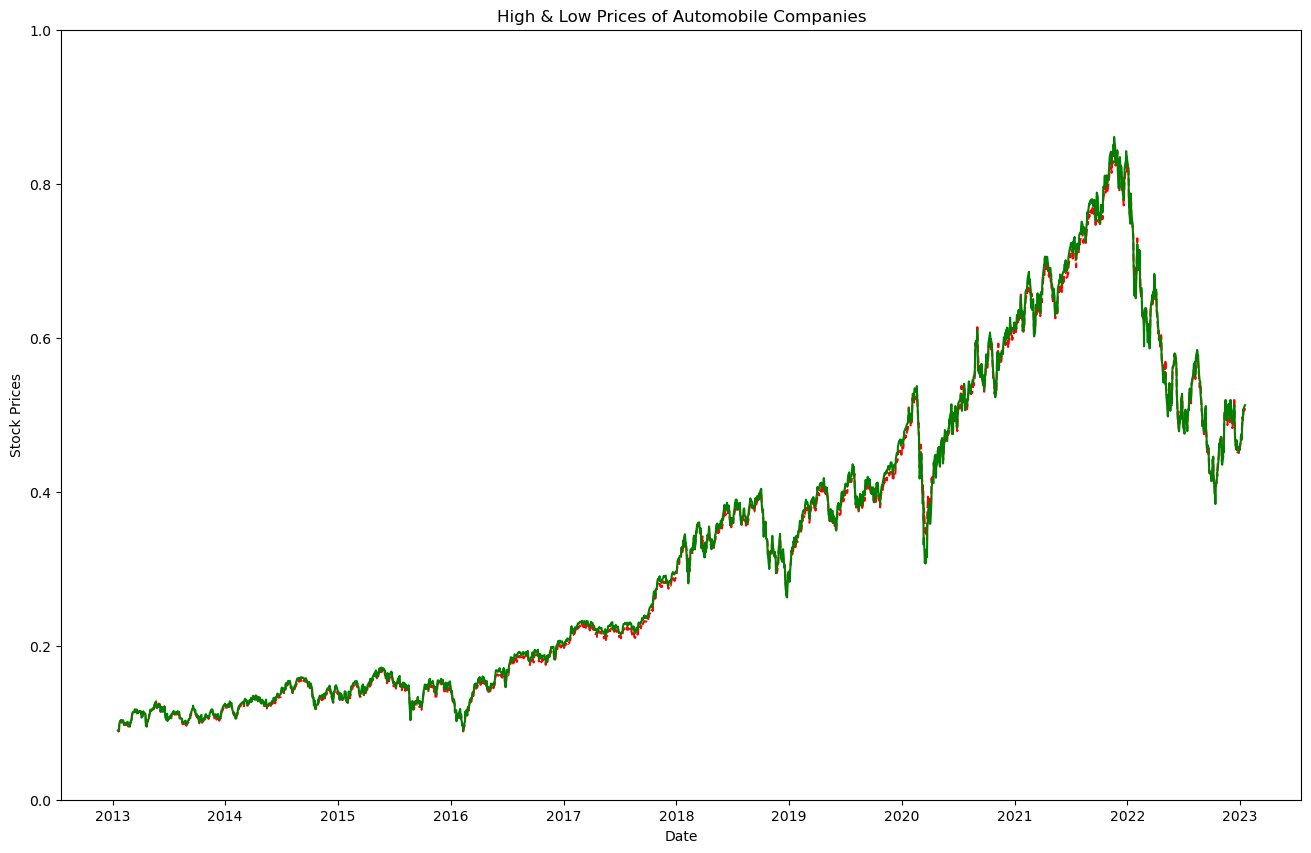

In [18]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(Sorted_df.High, color='red', linestyle= '--')
ax.plot(Sorted_df.Low, color='green')
ax.set(title = "High & Low Prices of Automobile Companies",
       xlabel = "Date",
       ylabel = "Stock Prices")


plt.ylim(0, 1)

## Multilinear Regression Machine Learning Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [20]:
train_df = Sorted_df[(Sorted_df.index < '2022-01-01')]
X_train = train_df[['High','Low']]
y_train = train_df['Volume']


test_df = Sorted_df[(Sorted_df.index >= '2022-01-01')]
X_test = test_df[['High', 'Low']]
y_test = test_df['Volume']

  
print("TRAIN")
print("Y train Shape: " + str(y_train.shape))
print("X train Shape: " + str(X_train.shape))

print("\nTEST")
print("Y test Shape: " + str(y_test.shape))
print("X test Shape: " + str(X_test.shape))

TRAIN
Y train Shape: (2255,)
X train Shape: (2255, 2)

TEST
Y test Shape: (261,)
X test Shape: (261, 2)


In [21]:
model=LinearRegression()

In [22]:
model.fit(X_train,y_train)

LinearRegression()

## Model Validation

In [23]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 0.10444130782621382
Coefficients: [ 4.31721616 -4.30952267]


In [24]:
r2 = model.score(X_train, y_train)
print("Model R2: " + str(r2))

Model R2: 0.3824735896922773


In [25]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [26]:
X = sm.add_constant(X_train) # adding a constant

olsmod = sm.OLS(y_train, X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     697.4
Date:                Fri, 03 Feb 2023   Prob (F-statistic):          1.90e-236
Time:                        09:53:11   Log-Likelihood:                 4979.2
No. Observations:                2255   AIC:                            -9952.
Df Residuals:                    2252   BIC:                            -9935.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1044      0.001    100.262      0.0

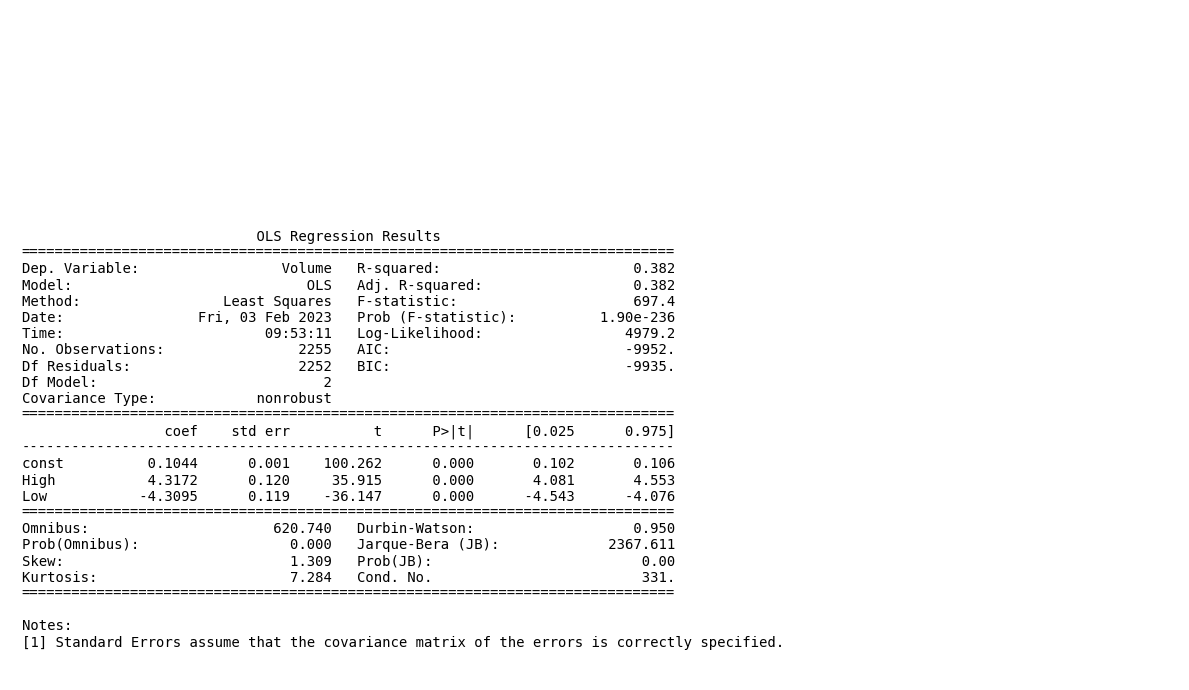

In [27]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(olsmod.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

In [28]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.38247358969227696


## Make Future Predictions

In [29]:
print("\nTEST")
print("Y test Shape: " + str(y_test.shape))
print("X test Shape: " + str(X_test.shape))


TEST
Y test Shape: (261,)
X test Shape: (261, 2)


In [30]:
Predictions = model.predict(X_test)

print("prediction shape: " + str(Predictions.shape))

prediction shape: (261,)


In [31]:
Pred_df=pd.DataFrame( {"Prediction": Predictions, "Actual": y_test})
Sorted_pred_df =Pred_df.sort_values(by=['Date'])
Sorted_pred_df

,Prediction,Actual
Date,,
2022-01-03,0.105550,0.078816
2022-01-04,0.131121,0.117288
2022-01-05,0.149268,0.164370
2022-01-06,0.127224,0.125969
2022-01-07,0.104666,0.106989
...,...,...
2023-01-10,0.090873,0.064977
2023-01-11,0.086195,0.092409
2023-01-12,0.106570,0.091023


In [32]:
Sorted_pred_df.to_csv('Tech_Pred_df.csv', encoding='utf-8')

(0.0, 0.2)

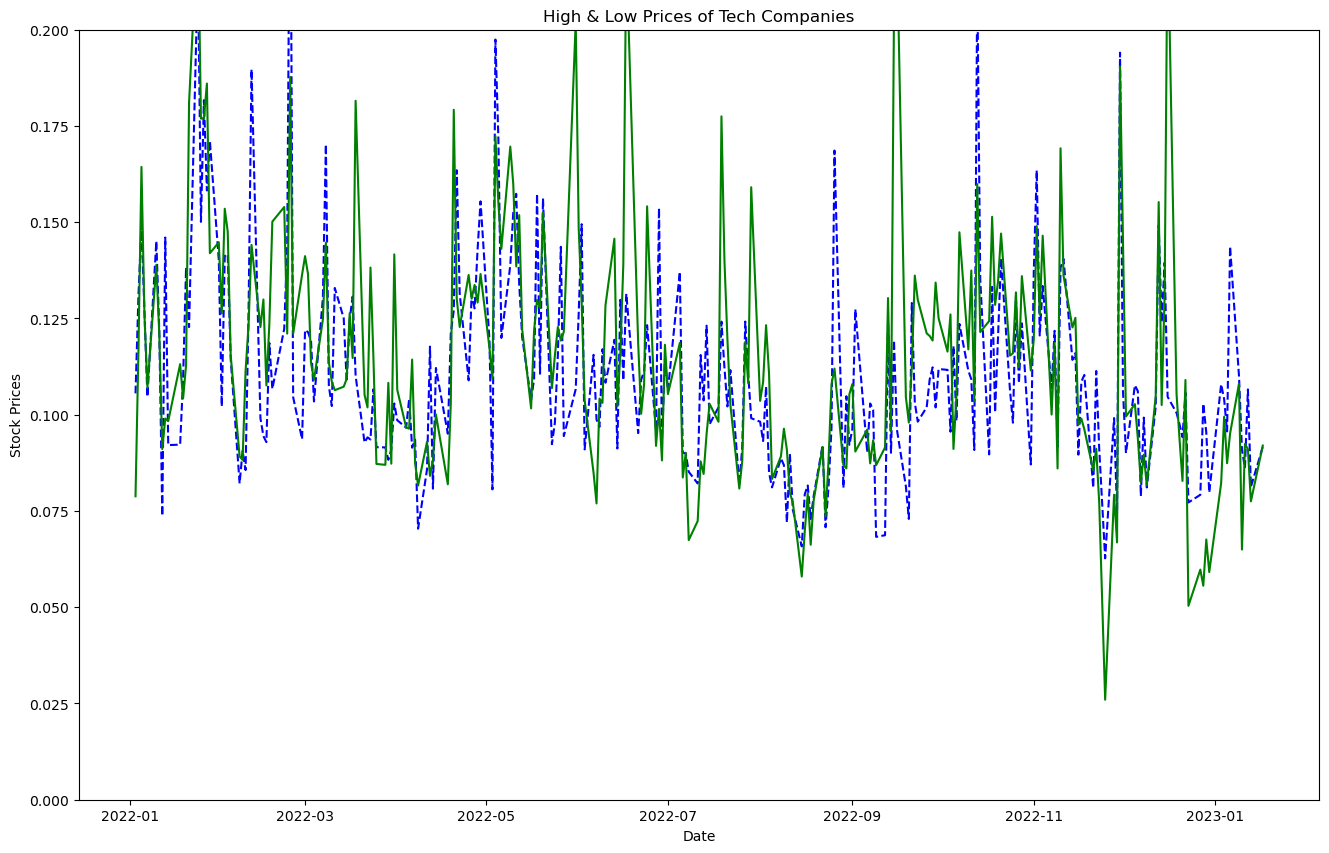

In [33]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(Sorted_pred_df.Prediction, color='blue', linestyle= '--')
ax.plot(Sorted_pred_df.Actual, color='green')
ax.set(title = "High & Low Prices of Tech Companies",
       xlabel = "Date",
       ylabel = "Stock Prices")


plt.ylim(0, 0.2)

(0.0, 0.2)

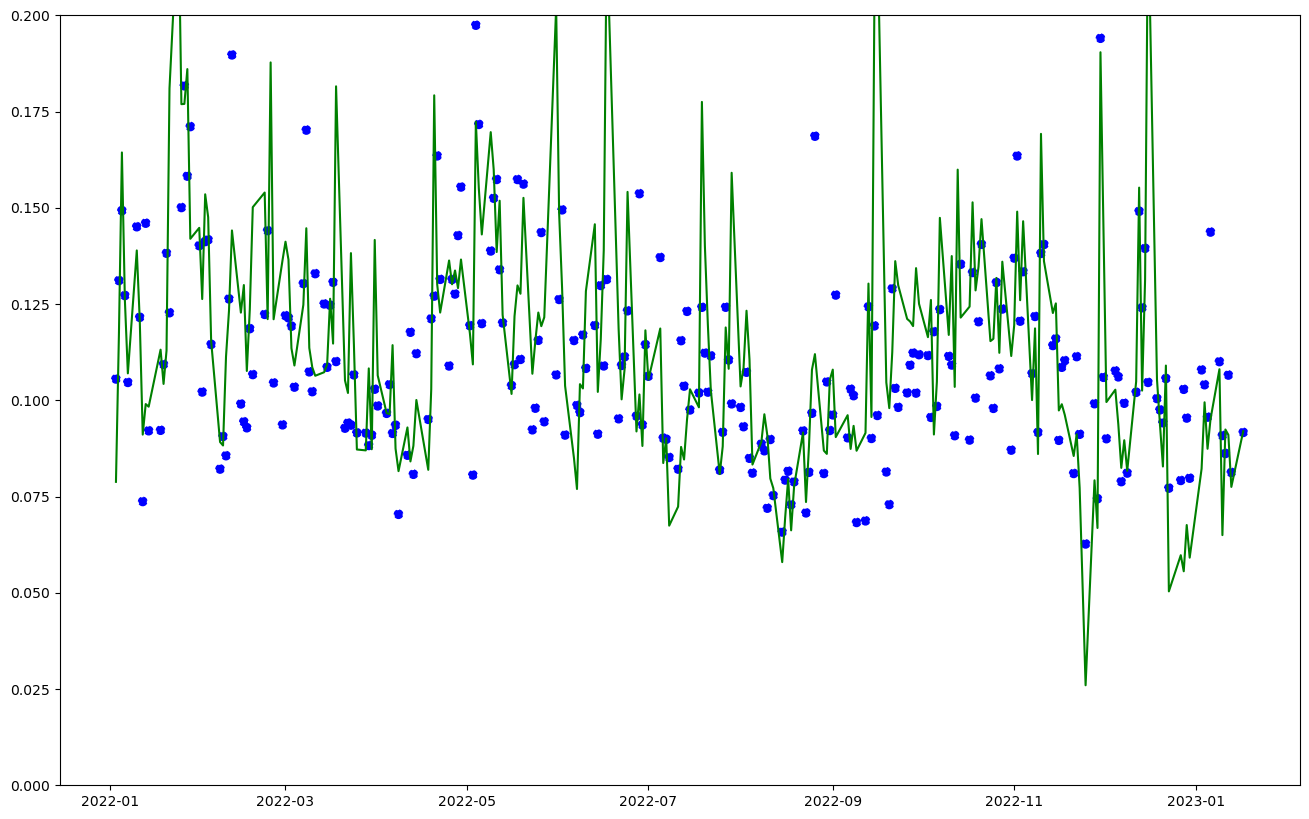

In [34]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(Sorted_pred_df.index,Sorted_pred_df.Prediction,color='blue', linestyle= '--')
ax.plot(Sorted_pred_df.Actual, color='green')
plt.ylim(0, 0.2)

In [35]:
r2 = model.score(X_test, y_test)

print("Prediction score: " + str(r2))

Prediction score: 0.35332000724950496


## 3D representation of the Multilinear Machine Learning Model

In [38]:
# Prepare data
X = tech_df[['High', 'Low']].values.reshape(-1,2)
Y = tech_df['Volume']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y



xx_pred = np.linspace(0, 1,20)  # range of High  values

yy_pred = np.linspace(0,1,20)  # range of Low values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T


/Users/qiuzi/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/Users/qiuzi/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


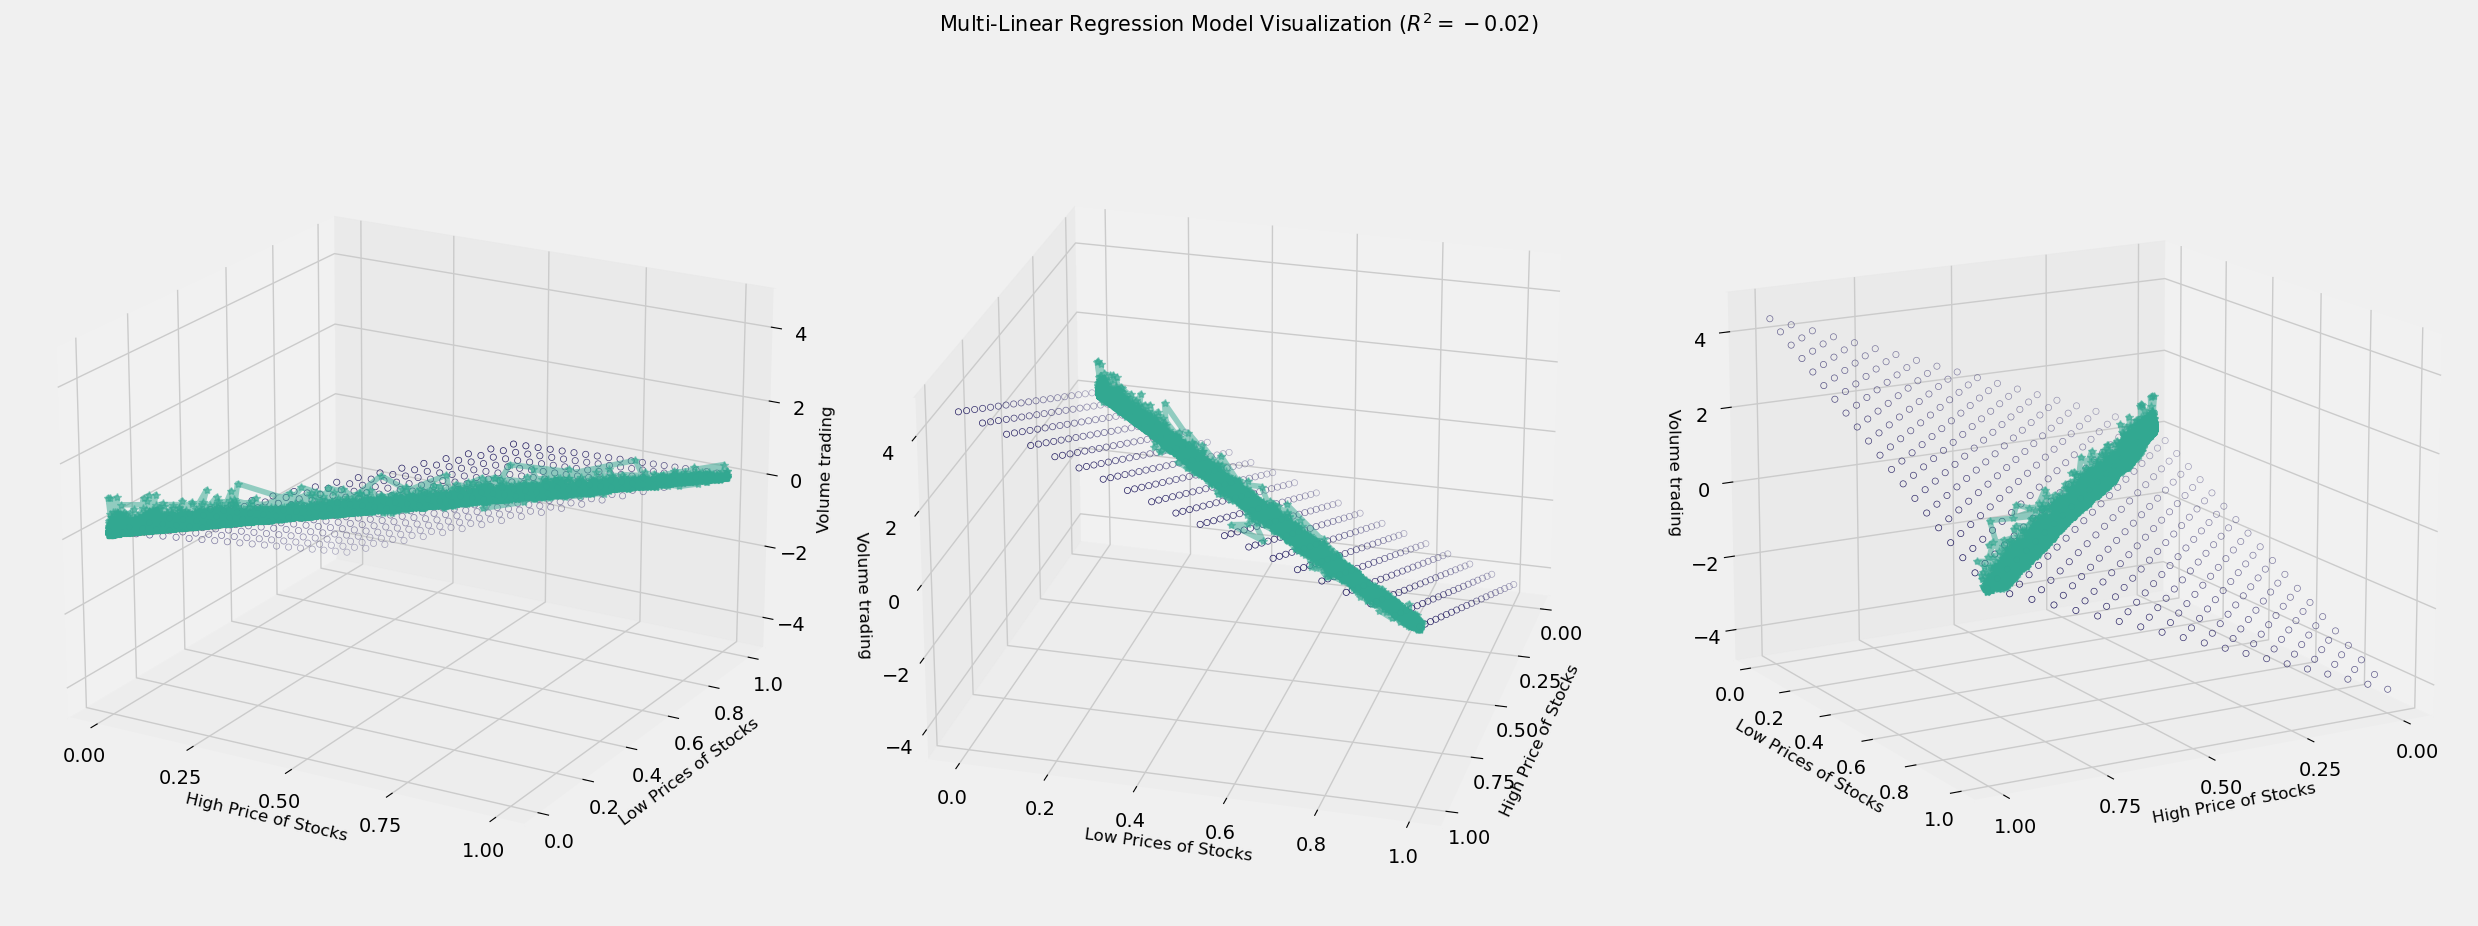

In [48]:
predicted = model.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(25, 10))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='#32a891', zorder=15, linestyle='-', marker='*', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#150e57')
    ax.set_xlabel('High Price of Stocks', fontsize=12)
    ax.set_ylabel('Low Prices of Stocks', fontsize=12)
    ax.set_zlabel('Volume trading ', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

    


ax1.view_init(elev=20, azim=-60)
ax2.view_init(elev=25, azim=15)
ax3.view_init(elev=15, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()

In [50]:
fig.savefig('3d_graph.png')

Pearson correlation coefficient matrix of each variables:
           Volume      High       Low
Volume  1.000000 -0.060095 -0.071368
High   -0.060095  1.000000  0.999129
Low    -0.071368  0.999129  1.000000


/Users/qiuzi/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


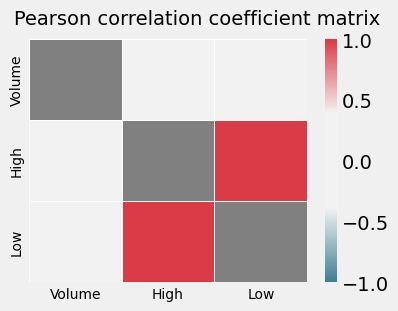

In [42]:
corr = tech_df[['Volume', 'High', 'Low']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()